# Regressão 01 - tarefa 03 - transformações em X e Y

## Carregue os pacotes necessários e a base de gorjetas.

In [1]:
!pip install util-gfsilveira

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from seaborn import load_dataset

from sklearn.metrics import r2_score
from scipy.stats import pearsonr, zscore

import patsy
import statsmodels.api as sm

from util import printLis

In [3]:
# Importando os dados
df = sns.load_dataset("tips")
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])
df['net_bill'] = df['total_bill'] - df['tip']

df_copy = df[df['tip_pct']<.5].copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## 1 Modelo no valor da gorjeta

### 1.1 Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.

In [4]:
# Matriz de design de variáveis independentes
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', df_copy)
X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [5]:
# Matriz dependente
y[:5]

array([[1.01],
       [1.66],
       [3.5 ],
       [3.31],
       [3.61]])

### 1.2 Remova as variáveis não significantes.

In [6]:
# Treinando e analisando o modelo
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           8.79e-23
Time:                        17:14:20   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.

In [7]:
# Treinando o modelo, retirando a única variável significativa, conta líquida
y, X = patsy.dmatrices('tip ~ sex + smoker + time', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.465
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.225
Time:                        17:14:20   Log-Likelihood:                -418.76
No. Observations:                 242   AIC:                             845.5
Df Residuals:                     238   BIC:                             859.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8066      0.228     12.

In [8]:
# Treinando o modelo, mantendo apenas a variável significativa, conta líquida
y, X = patsy.dmatrices('tip ~ net_bill', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.41e-25
Time:                        17:14:20   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.0

### 1.3 observe o gráfico de resíduos em função de ```net_bill```.

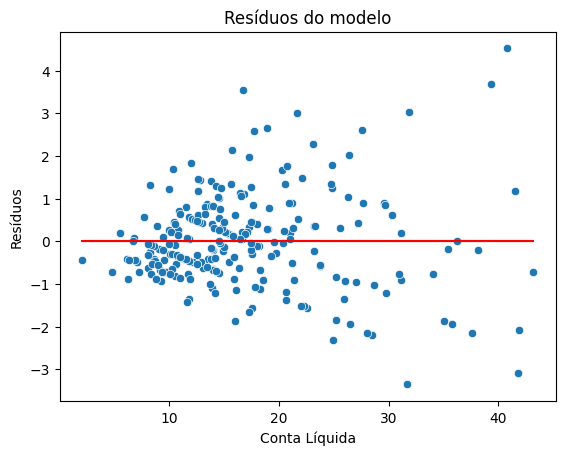

In [9]:
# Analisando os resíduos
x = df_copy.net_bill
y = modelo.resid
sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

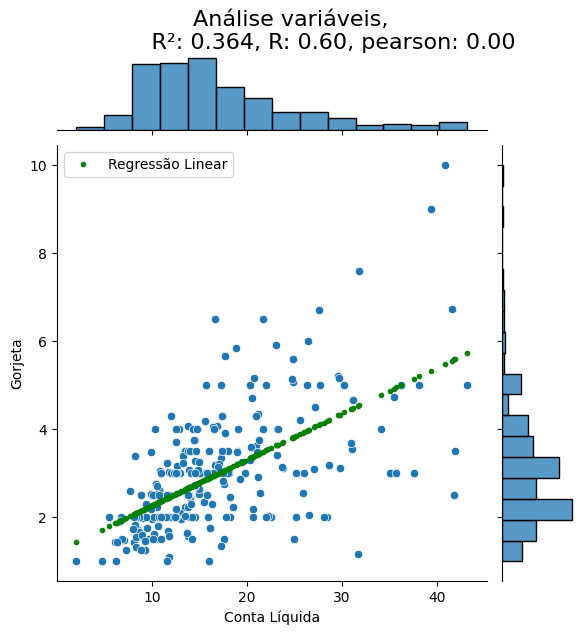

In [10]:
# Analisando o modelo
x = df_copy.net_bill
y = df_copy.tip
pred = modelo.fittedvalues

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão Linear')

plt.legend(loc="upper left")

r_square = modelo.rsquared
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

### 1.4 teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [11]:
# Obtendo a matriz de designe e treinando o modelo com o polinômio de conta líquida
y, X = patsy.dmatrices('tip ~ np.power(net_bill, 2)', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.30e-21
Time:                        17:14:21   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.22

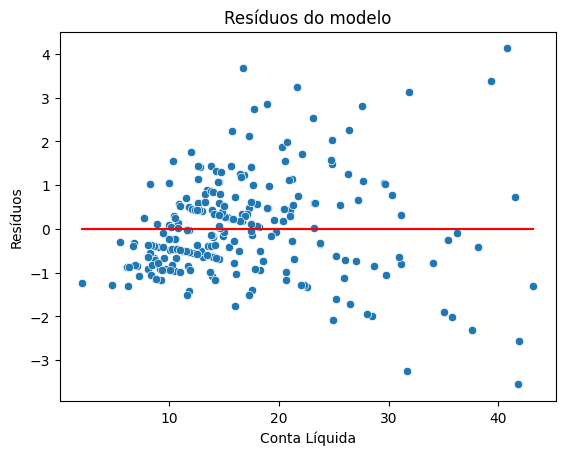

In [12]:
# Analisando os resíduos
x = df_copy.net_bill
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

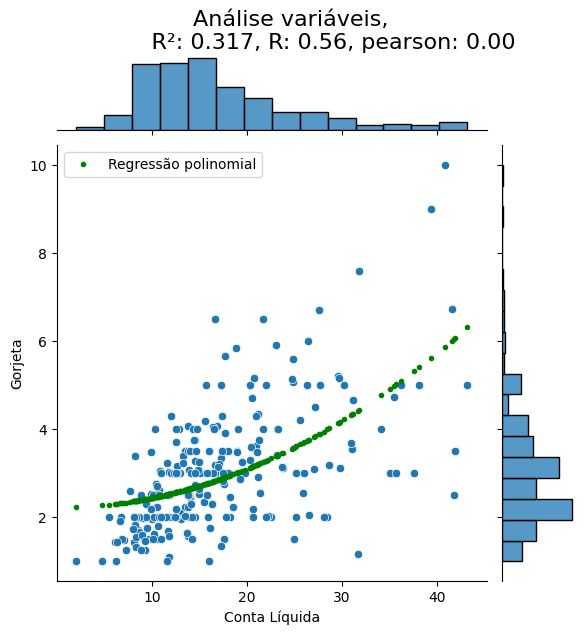

In [13]:
# Analisando o modelo
x = df_copy.net_bill
y = df_copy.tip
pred = modelo.fittedvalues

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão polinomial')

plt.legend(loc="upper left")

r_square = modelo.rsquared
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

#### Conclusão

- A única variável significativa para explicar a gorjeta foi a conta líquida. As demais variáveis não foram significativas. Um modelo contendo todas as variáveis teve R² de 0,369, contendo apenas as não significativas, R² de 0,018, e contendo apenas a conta líquida, R² de 0,364.
- Mesmo com essa métrica, a análise de resíduos mostra que esses não têm variância uniforme, com um formato de guarda-chuva. A análise do gráfico de dispersão mostra que temos uma relação positiva entre o modelo e os dados, porém, são observados dados outliers.
- Atransformação polinomial das contas líquidas, não melhorou o R², indo para 0,317, permanencendo os resíduos com o mesmo pdrão, apesar da dispersão do modelo parecer ter um melhor ajuste.

---

## 2 Modelo no valor do percentual da gorjeta

### 2.1 Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.

In [14]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     31.32
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           6.07e-21
Time:                        17:14:23   Log-Likelihood:                -90.268
No. Observations:                 242   AIC:                             190.5
Df Residuals:                     237   BIC:                             208.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4070      0.076      5.

### 2.2 Remova as variáveis não significantes.

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     123.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.82e-23
Time:                        17:14:23   Log-Likelihood:                -91.279
No. Observations:                 242   AIC:                             186.6
Df Residuals:                     240   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4604      0.053      8.617      0.0

### 2.3 Observe o gráfico de resíduos em função de ```net_bill```

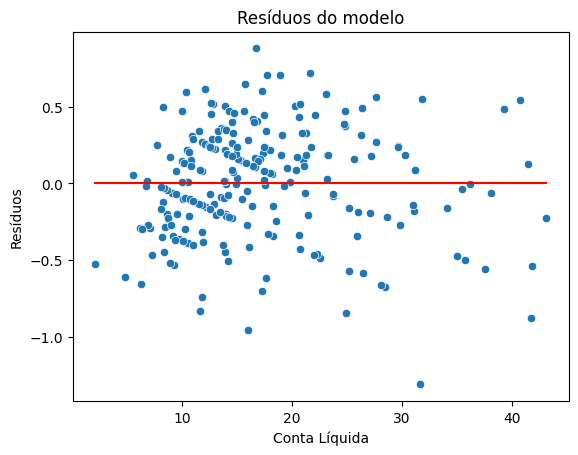

In [16]:
# Analisando os resíduos
x = df_copy.net_bill
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

### 2.4 Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [17]:
y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2)', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     86.19
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.01e-17
Time:                        17:14:23   Log-Likelihood:                -104.49
No. Observations:                 242   AIC:                             213.0
Df Residuals:                     240   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.77

In [18]:
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', df_copy)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     157.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           4.20e-28
Time:                        17:14:23   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

### 2.5 Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

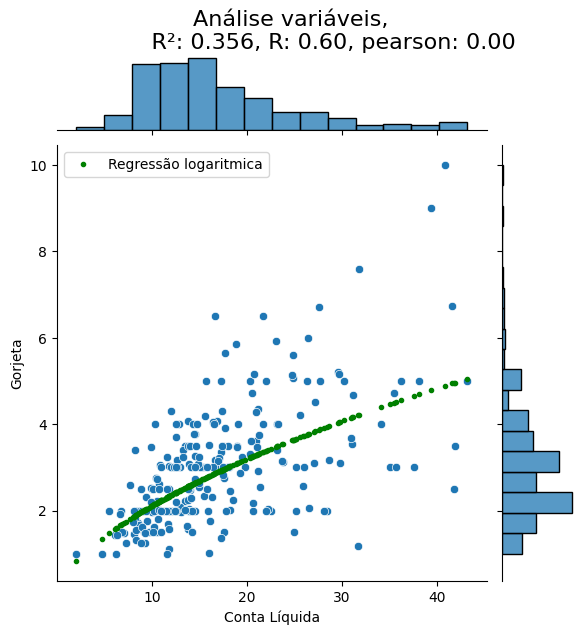

In [19]:
x = df_copy.net_bill
y = df_copy.tip
pred = np.exp(modelo.fittedvalues)

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão logaritmica')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

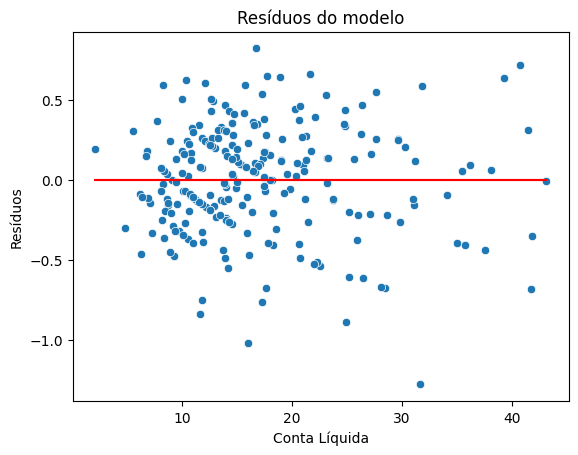

In [20]:
# Analisando os resíduos
x = df_copy.net_bill
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

#### Conclusão

- O modelo de regressão multipla do log da variável gorjeta, mostrou discreta piora no R², 0,346, quando comparado com o modelo de regressão multipla anterior.
- Mantendo apenas a variável conta líquida, a única significativa, foi possível obeter R² de 0,34, menor que a anterior.
- Com a transformação da gorjeta, os resíduos parecem apresentar uma variância uniforme, porém, com uma padrão de concentração dos dados na porção inferior a mediana.
- Transformando também a variável explicativa em polinômio de grau dois, o R² foi pior, 0,264, porém, na transformação para log, foi obtida a melhor métrica, R² de 0,396. Retornando os dados de gorjeta ao original, o R² foi de 0,356, sendo ainda melhor que os anteriores. Os resíduos parecem apresentar uma variância uniforme, porém, com uma padrão de concentração dos dados na porção inferior a mediana.

---

## 3 Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|


In [21]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_10/"
link += "Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv"

df = pd.read_csv(link)
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [22]:
df_copy_dropna = df.dropna().copy()
df_copy_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12466 non-null  object 
 1   sexo                   12466 non-null  object 
 2   posse_de_veiculo       12466 non-null  bool   
 3   posse_de_imovel        12466 non-null  bool   
 4   qtd_filhos             12466 non-null  int64  
 5   tipo_renda             12466 non-null  object 
 6   educacao               12466 non-null  object 
 7   estado_civil           12466 non-null  object 
 8   tipo_residencia        12466 non-null  object 
 9   idade                  12466 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  12466 non-null  float64
 12  mau                    12466 non-null  bool   
 13  renda                  12466 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

### 3.1 Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [23]:
y, X = patsy.dmatrices("renda ~ tempo_emprego", df_copy_dropna)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:25   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

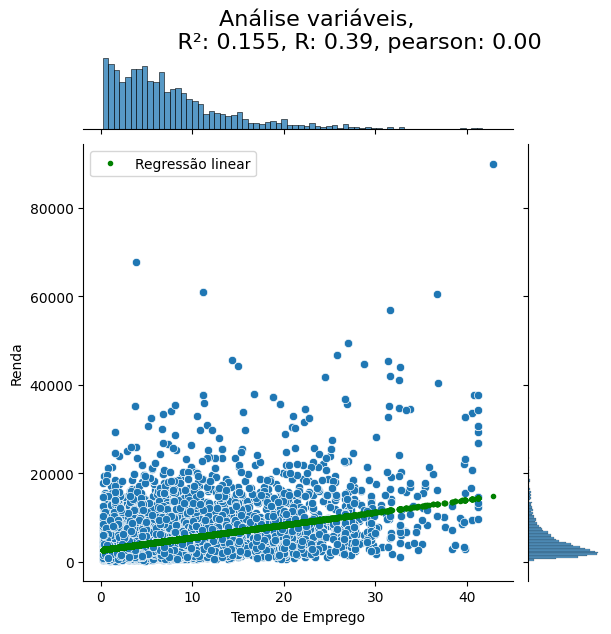

In [24]:
x = df_copy_dropna.tempo_emprego
y = df_copy_dropna.renda
pred = modelo.fittedvalues

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão linear')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda")

plt.show()

### 3.2 Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

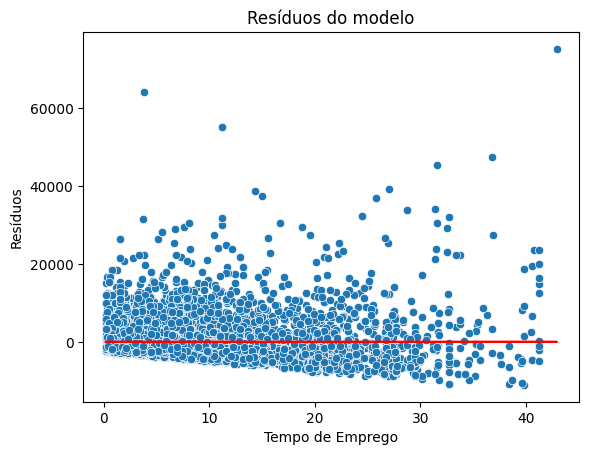

In [25]:
# Analisando os resíduos
x = df_copy_dropna.tempo_emprego
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.show()

In [26]:
df_copy_outliers = df_copy_dropna[(np.abs(zscore(df_copy_dropna.renda)) < 3)].copy()
df_copy_outliers.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


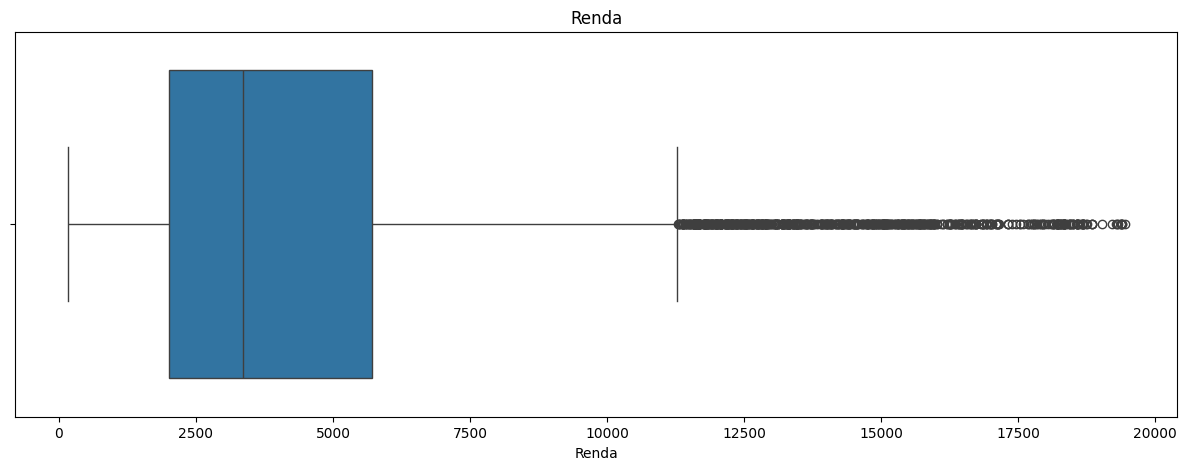

In [27]:
plt.figure(figsize=(15,5))
plt.title("Renda")
sns.boxplot(
    x="renda",
    data=df_copy_outliers,
)
plt.xlabel("Renda")
plt.show()

In [28]:
y, X = patsy.dmatrices("renda ~ tempo_emprego", df_copy_outliers)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1658.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:29   Log-Likelihood:            -1.1634e+05
No. Observations:               12241   AIC:                         2.327e+05
Df Residuals:                   12239   BIC:                         2.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3023.6023     45.051     67.115

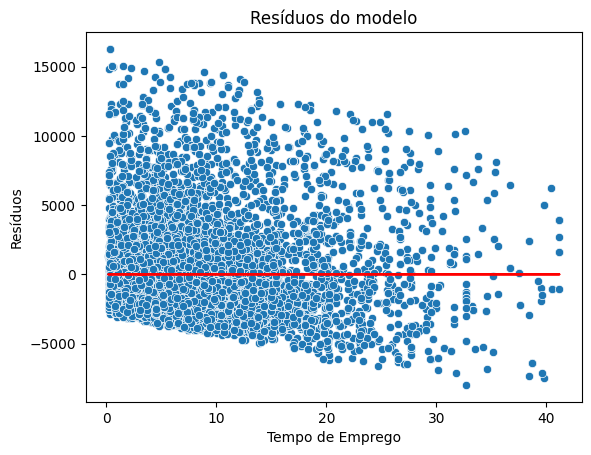

In [29]:
# Analisando os resíduos
x = df_copy_outliers.tempo_emprego
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.show()

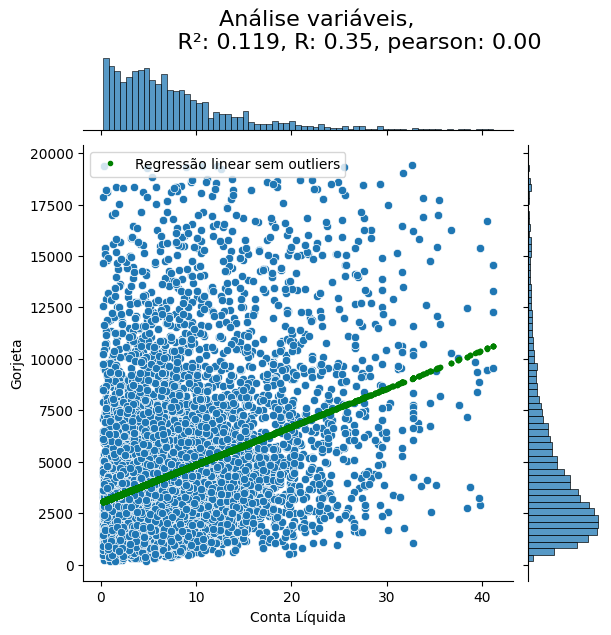

In [30]:
x = df_copy_outliers.tempo_emprego
y = df_copy_outliers.renda
pred = modelo.fittedvalues

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão linear sem outliers')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

In [31]:
y, X = patsy.dmatrices("np.log(renda) ~ tempo_emprego", df_copy_outliers)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     1552.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          8.98e-320
Time:                        17:14:34   Log-Likelihood:                -13234.
No. Observations:               12241   AIC:                         2.647e+04
Df Residuals:                   12239   BIC:                         2.649e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8215      0.010    790.288

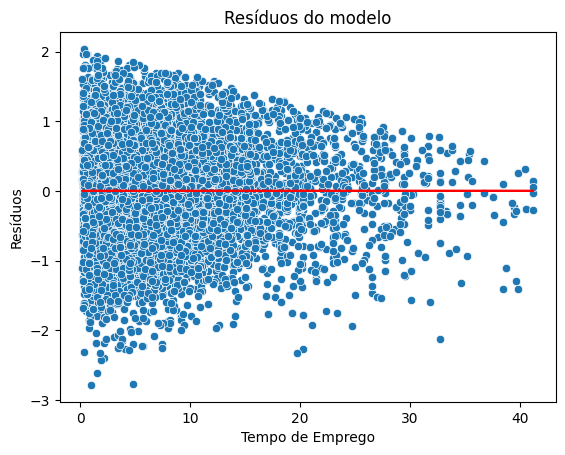

In [32]:
# Analisando os resíduos
x = df_copy_outliers.tempo_emprego
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.show()

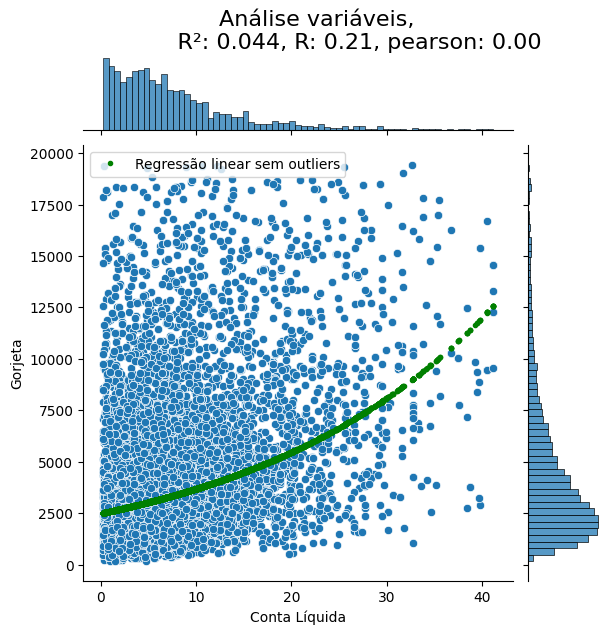

In [33]:
x = df_copy_outliers.tempo_emprego
y = df_copy_outliers.renda
pred = np.exp(modelo.fittedvalues)

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão linear sem outliers')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

### 3.3 Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.

In [34]:
df_copy_dropna.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [35]:
printLis(df_copy_dropna.columns)

-------------
-=< Lista >=-
-------------
0 -> data_ref
1 -> sexo
2 -> posse_de_veiculo
3 -> posse_de_imovel
4 -> qtd_filhos
5 -> tipo_renda
6 -> educacao
7 -> estado_civil
8 -> tipo_residencia
9 -> idade
10 -> tempo_emprego
11 -> qt_pessoas_residencia
12 -> mau
13 -> renda


In [36]:
variaveis = "renda ~ "
variaveis += " + ".join(df_copy_dropna.columns[1:-1])
variaveis

'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau'

In [37]:
y, X = patsy.dmatrices(variaveis, df_copy_dropna)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:37   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### 3.4 Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [38]:
selected = [1,3,5,6,9,10]
df_copy_dropna.iloc[:, selected].head()

,sexo,posse_de_imovel,tipo_renda,educacao,idade,tempo_emprego
0,F,True,Assalariado,Secundário,36,3.575342
1,M,True,Empresário,Secundário,42,0.860274
2,M,True,Assalariado,Superior completo,31,8.065753
3,F,False,Empresário,Secundário,50,1.208219
4,M,False,Assalariado,Secundário,52,13.873973


In [39]:
variaveis = "renda ~ "
variaveis += " + ".join(df_copy_dropna.columns[selected])
y, X = patsy.dmatrices(variaveis, df_copy_dropna)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     292.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:38   Log-Likelihood:            -1.2200e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12453   BIC:                         2.441e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [40]:
variaveis = "np.log(renda) ~ "
variaveis += " + ".join(df_copy_dropna.columns[selected])
y, X = patsy.dmatrices(variaveis, df_copy_dropna)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     328.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:38   Log-Likelihood:                -13215.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12453   BIC:                         2.655e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### 3.5 Faça uma análise de resíduos. Avalie a qualidade do ajuste.

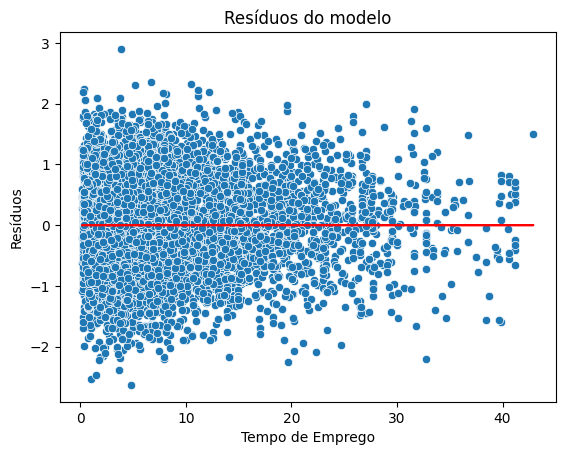

In [41]:
# Analisando os resíduos
x = df_copy_dropna.tempo_emprego
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.show()

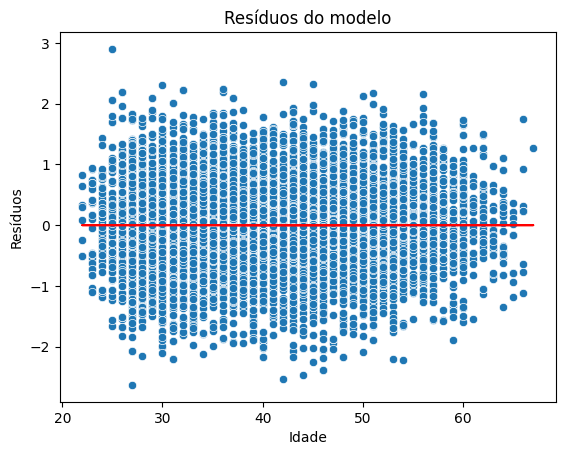

In [42]:
# Analisando os resíduos
x = df_copy_dropna.idade
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Idade")
plt.ylabel("Resíduos")
plt.show()

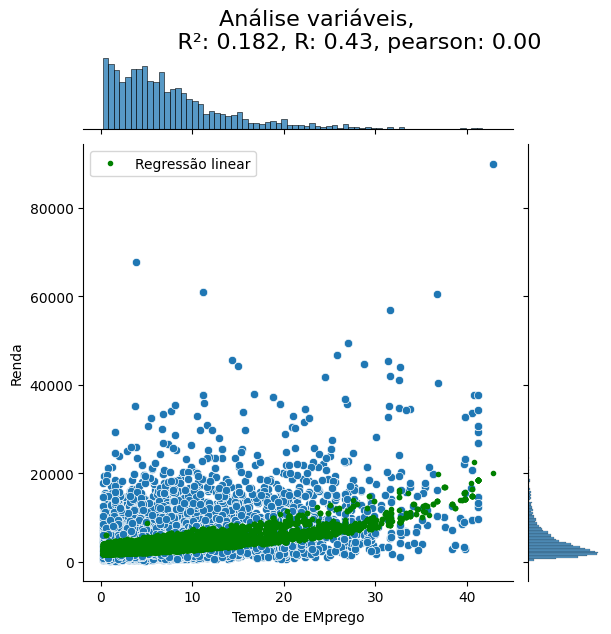

In [43]:
x = df_copy_dropna.tempo_emprego
y = df_copy_dropna.renda
pred = np.exp(modelo.fittedvalues)

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão linear')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Tempo de EMprego")
plt.ylabel("Renda")

plt.show()

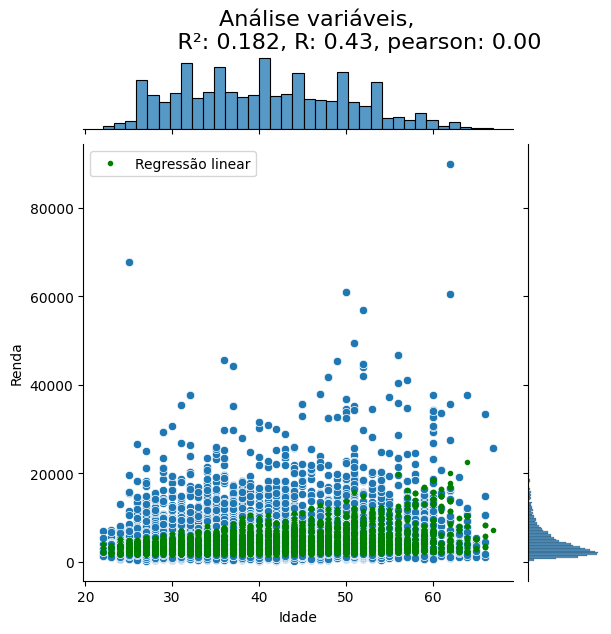

In [44]:
x = df_copy_dropna.idade
y = df_copy_dropna.renda
pred = np.exp(modelo.fittedvalues)

sns.jointplot(
    x=x,
    y=y,
)

plt.plot(x, pred, '.g', label='Regressão linear')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Idade")
plt.ylabel("Renda")

plt.show()

#### Conclusão

- Do banco de dados original, foram retiradas as observações faltantes, com a função dropna();
- Após essa estruturação, foi instânciado o modelo de regressão simples com tempo de emprego como variável independente e renda como variável dependente, obtendo-se um R² de 0,155. A dispersão dos dados de renda mostra provavelmente a presença de outliers;
- Já os resíduos mostram a presença destes mesmod possíveis outliers, com um menor aspecto de indepência, com a redução gradual dos níveis de erro com o aumento do tempo de emprego;
- Uma análise de boxplot confirma a presença dos outliers. Porém, retirar esses não fez com que o R² fosse melhorado, apresentando 0,119, com os resíduos confirmando a ausência de aspecto de independência. Porém, a dispersão dos dados em relação ao modelo na ausencia de outliers parece ser mais homogênea.
- Na transformação da renda em log, na ausência de outliers, o modelo teve uma nova métrica inferior, R² de 0,113. Já os resíduos apresentaram uma redução da variância ao longo do crescimento da variável explicativa, tempo de emprego. Porém, o modelo pareceu melhor ajustado no gráfico de dispersão, o que não condiz com a métrica de R² = 0,044 apresentada.
- O modelo de regressão multipla para explicar renda, usando 12 variáveis independentes, apresentou uma melhora em relação a regressão simples, com R² de 0,221.
- A seleção das variáveis explicativas significativas manteve 6 das 12 originais. Com isso, o modelo teve R² de 0,22, mantendo a mesma métrica anterior. Já quando a mesma regressão multipla foi obtida com a variável dependente renda transformada em log, o R² foi de 0,24, melhorando o modelo.
- A análise dos resíduos foi feita com duas das variáveis independentes mais significativas no modelo, tempo de emprego e idade. Os resíduos não parecem ser independentes da variável tempo de emprego, com uma variância não uniforme, reduzindo com o aumento do tempo. Já para a variável idade, os resíduos parecem não ter um padrão evidênte, com aspecto de indenpendência em relação a idade e variância uniforme.
- Porém, a dispersão do modelo pode indicar algum padrão de overfiting, uma vez que os pontos do modelo estão dispersos na comparação da renda com a idade e o tempo de emprego.